# Techno Industries Inc.

Techno Industries Inc. a leader of manufacturing different equipment components, has observed that market demand
has been strong over the past few years with growth averaging 6.9% Year-on-Year.
As a Fortune 500 corporation, this good growth has led the company to expand their operation and distribution centers across 48 states in the US. With very good growth rates and lower barriers to entry due to government regulation, this has attracted a lot of new companies that increase competition drastically. New businesses are offering better and optimized delivery for components, and some companies have started using machine learning and artificial intelligence to create better technology and lower the production costs for existing components.
After Techno Industries Inc. lost several top long-term customers that brought 11% of the company's revenue, management decided to ceate short-term plan.
If this problem continues, the Techno Industries Inc. market share and potential customer-base will be at risk, also it will indicate a potential risk in the company’s ability to make dividend payments to shareholders if losses are too big.
Techno Industries Inc. currently includes 6 primary industries and 11 different types of components.
Management needs an immediate short-term action plan to address the loss of customers and protect the existing market share.

**The main goal of this project is to determine in which type of components Techno Industries Inc. should invest**

What percentage of customers in each segment purchase this specific component?     
What is the revenue breakdown per industry?    
Is there any seasonality in industry sales?     
What is the geographic distribution of each segment?     
Which segment yields the highest average profit margin?    
How do segments compare with the number of customers?    
Which products are driving the highest profit?      
Which product has the lowest profit?   
Which product has the highest growth potential?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Loading data and exploring dataset.

In [2]:
df = pd.read_excel(r'C:\Users\vikag\Desktop\Data-Science-Projects\Techno Industries Inc\Techno Industries Inc. Data.xlsx')

In [3]:
df.head().T

,Date,Customer ID,Product,State,Zip Code,Business Type,Cost (per unit),Price (per unit),Quantity,Revenue (total),Cost (total)
0,2015-10-22,ID36557,Microcontroller,Georgia,30642,Transportation,19.100,100.81,205.0,20666.05,3915.500
1,2015-09-22,ID42068,Wiring components,Wisconsin,53933,Industrial,16.255,100.71,14.0,1409.94,227.570
2,2015-12-26,ID6402,Wiring components,Indiana,47403,Industrial,16.255,98.64,13.0,1282.32,211.315
3,2015-04-04,ID1745,Wiring components,Illinois,60090,Transportation,16.255,98.64,23.0,2268.72,373.865
4,2015-05-25,ID6925,Thermostat,Florida,33009,Medical,15.245,97.01,16.0,1552.16,243.920


In [4]:
df.describe()

,Zip Code,Cost (per unit),Price (per unit),Quantity,Revenue (total),Cost (total)
count,45516.000000,45516.000000,45516.000000,45516.000000,45516.000000,45516.000000
mean,52364.166447,2.632562,7.455079,212.357523,918.014754,375.560081
std,31658.902561,3.654429,10.237572,1874.468932,4325.882521,2226.750648
min,1001.000000,0.550000,0.020000,0.000000,0.000000,0.000000
25%,19969.500000,1.060000,3.300000,10.000000,54.000000,17.250000
50%,53012.500000,1.725000,4.500000,36.000000,187.200000,60.980000
75%,83531.250000,2.215000,6.700000,115.000000,584.800000,227.065625
max,99403.000000,19.100000,100.810000,222317.000000,397947.430000,235656.020000


In [5]:
df.dtypes

Date                datetime64[ns]
Customer ID                 object
Product                     object
State                       object
Zip Code                     int64
Business Type               object
Cost (per unit)            float64
Price (per unit)           float64
Quantity                   float64
Revenue (total)            float64
Cost (total)               float64
dtype: object

# Data Wrangling

In [6]:
df.isna().sum()

Date                0
Customer ID         0
Product             0
State               7
Zip Code            0
Business Type       0
Cost (per unit)     0
Price (per unit)    0
Quantity            0
Revenue (total)     0
Cost (total)        0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,Date,Customer ID,Product,State,Zip Code,Business Type,Cost (per unit),Price (per unit),Quantity,Revenue (total),Cost (total)
290,2015-08-24,ID16009,Thermostat,NaN,88013,Industrial,15.245,61.74,5.0,308.70,76.225
932,2015-10-06,ID42905,Thermostat,NaN,88013,Transportation,15.245,46.20,16.0,739.20,243.920
10094,2015-05-05,ID42904,"LCD, LED, OLED displays",NaN,88013,Transportation,2.060,7.20,107.0,770.40,220.420
17952,2015-05-26,ID16008,"LCD, LED, OLED displays",NaN,88013,Industrial,2.060,4.95,6.0,29.70,12.360
18009,2015-03-03,ID16007,Circuit breakers,NaN,88013,Industrial,2.490,4.95,17.0,84.15,42.330
22257,2015-10-18,ID42902,Resistors,NaN,88013,Transportation,1.575,4.50,2.0,9.00,3.150
22293,2015-01-01,ID42903,Circuit breakers,NaN,88013,Transportation,2.490,4.50,2.0,9.00,4.980


Zip Code 88013 is belongs to Las Cruces, New Mexico.    
I will fill missing states with New Mexico.

In [8]:
df.fillna('New Mexico', inplace=True)

In [9]:
df.isna().sum()

Date                0
Customer ID         0
Product             0
State               0
Zip Code            0
Business Type       0
Cost (per unit)     0
Price (per unit)    0
Quantity            0
Revenue (total)     0
Cost (total)        0
dtype: int64

Changing datatype of column QUANTITY from float to int.

In [10]:
df['Quantity'] = df['Quantity'].astype(int)

In [11]:
df.dtypes

Date                datetime64[ns]
Customer ID                 object
Product                     object
State                       object
Zip Code                     int64
Business Type               object
Cost (per unit)            float64
Price (per unit)           float64
Quantity                     int32
Revenue (total)            float64
Cost (total)               float64
dtype: object

In [23]:
df.head().T

,0,1,2,3,4
Date,2015-10-22 00:00:00,2015-09-22 00:00:00,2015-12-26 00:00:00,2015-04-04 00:00:00,2015-05-25 00:00:00
Customer ID,ID36557,ID42068,ID6402,ID1745,ID6925
Product,6,10,10,10,9
State,8,46,11,10,7
Zip Code,30642,53933,47403,60090,33009
Business Type,5,2,2,5,4
Cost (per unit),19.1,16.255,16.255,16.255,15.245
Price (per unit),100.81,100.71,98.64,98.64,97.01
Quantity,205,14,13,23,16
Revenue (total),20666.05,1409.94,1282.32,2268.72,1552.16


# Exploratory Data Analysis

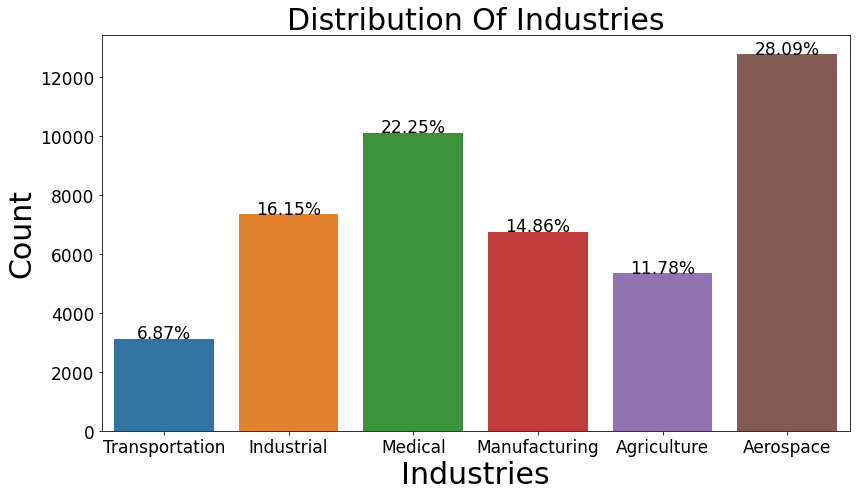

In [13]:
plt.figure(figsize=(12,7))
total = len(df['Business Type'])
ax = sns.countplot(x='Business Type', data=df)
for h in ax.patches:
    height = h.get_height()
    ax.text(h.get_x() + h.get_width() / 2., height + 3,'{:1.2f}'.format((height/total)*100) + '%',
            ha="center",size=17)
plt.yticks(size = 17)
plt.xticks(size = 17)
plt.xlabel('Industries', size = 30)
plt.ylabel('Count', size = 30)
plt.title('Distribution Of Industries', size = 30)
plt.tight_layout()

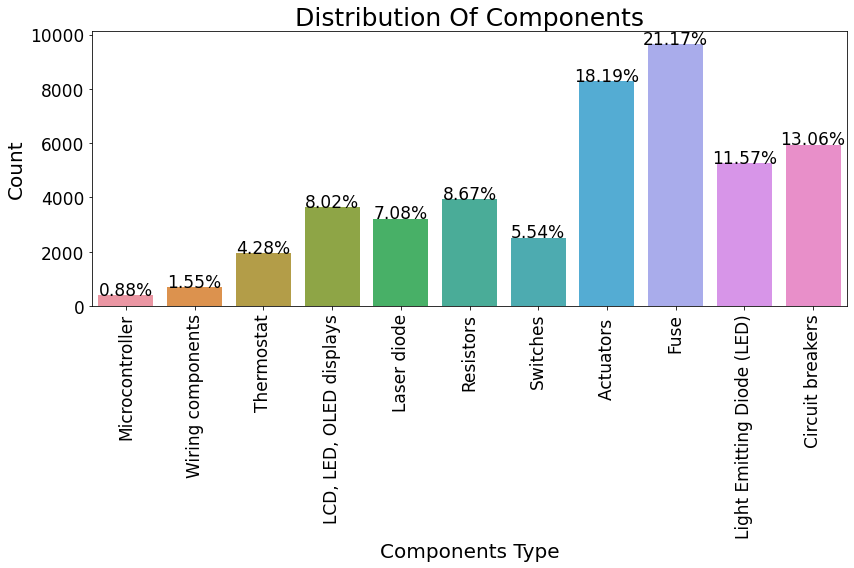

In [14]:
plt.figure(figsize=(12,8))
total = len(df['Product'])
ax = sns.countplot(x='Product', data=df)
for h in ax.patches:
    height = h.get_height()
    ax.text(h.get_x() + h.get_width() / 2., height + 3,'{:1.2f}'.format((height/total)*100) + '%',
            ha="center",size=17)
plt.yticks(size = 17)
plt.xticks(size = 17)
plt.xlabel('Components Type', size = 20)
plt.xticks(rotation=90)
plt.ylabel('Count', size = 20)
plt.title('Distribution Of Components', size = 25)
plt.tight_layout()